<a href="https://colab.research.google.com/github/Spark095/11101ML/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# 整理資料/資料預處理
# Pandas 兩個型態： DataFrame(表格, 2D)/Series(一行/一列, 1D)
# 資料的量到底要多少才夠
# 看你的的問題的難易度來決定(簡單：少一點，難：多一點) 欄位數量:(少:簡單 多:難)
# ML： 千->萬 DL： 萬->十萬
from sklearn.datasets import load_iris
import pandas as pd
#load_iris()
iris = load_iris()
#新增dataframe 插入資料 和行標籤
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
# 新增 ans 欄位 == target
df["ans"] = iris["target"]
df.to_csv("iris.csv", encoding="utf-8", index=False)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [50]:
# 資料切成兩份
# 資料整理/預處理：pandas 機器學習： numpy
import numpy as np
# 型態: numpy array
# np.array(df["ans"])
# pandas 去除一行 drop axis=0 remove row, axis=1 remove column
# 轉改 np.array
# 題目
x = np.array(df.drop(["ans"], axis=1))
# 答案
y = np.array(df["ans"])

In [51]:
from sklearn.model_selection import train_test_split
# 大部分人會 90：10 or 80:20 切
# # 如果給二個 list 在分的時候會把前二個對應起來 
# train_test_split([1, 2, 3, 4], ["a", "b", "c", "d"], test_size=0.25)
# 輸出的結果 [[第一組的訓練資料],[第一組的測試資料],[第二組的訓練資料],[第二組的測試資料]]
# [[3, 2, 1], [4], ['c', 'b', 'a'], ['d']]
# [90%x, 10%x, 90%y, 10%y]
# 會拿[x 90%資料],[X留10% 資料],[驗證 y 90%答案][Y 10% 答案] 去對模型
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [52]:
from sklearn.tree import DecisionTreeClassifier
# 建立空 clf
clf = DecisionTreeClassifier(max_depth=2)
# 將 90%問題 和90%答案 放入
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 135\nvalue = [43, 45, 47]\nclass = virginica'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 43\nvalue = [43, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 92\nvalue = [0, 45, 47]\nclass = virginica'),
 Text(0.4, 0.16666666666666666, 'gini = 0.183\nsamples = 49\nvalue = [0, 44, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.045\nsamples = 43\nvalue = [0, 1, 42]\nclass = virginica')]

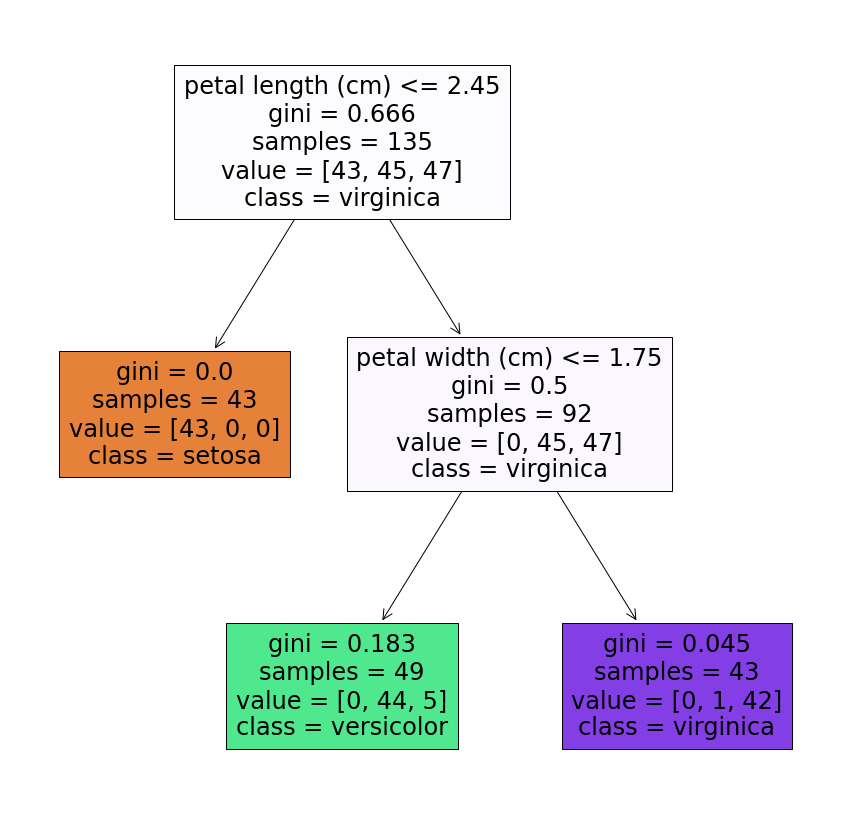

In [53]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# 設定圖顯示的大小
plt.figure(figsize=(15, 15))
# 將表的 feature_name（花瓣長度 判断式） 顯示出來，將 class_name（花名） 顯示出來, filled 上色
plot_tree(clf,
     feature_names=iris["feature_names"],
     class_names=iris["target_names"],
     filled=True)

In [54]:
# 驗證模型表現得如何 (回頭調整參數)
# 選擇評估標準 1. 正確率 2. f1 score(imbalanced)
from sklearn.metrics import accuracy_score
# 預測
pre = clf.predict(x_test)
# 正確率 對照 預測
accuracy_score(y_test, pre)

1.0